In [1]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=80d7edfbc851bc63b3d27a532e7acd64a63b690c72a040a74030ebed4d12e037
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


In [2]:
!gdown -O sc1_Phase1_GE_FeatureMatrix.tsv 1buHUNHKd6zd3RPBOqoo640IvcCGg8vvW
!gdown -O sc1_Phase1_GE_Phenotype.tsv 1XwMe38_jYx70NoZj59S8U1xX8KVHdgdn
!gdown -O sc1_Phase1_GE_Outcome.tsv 1Z7yDZvOnvI0SjoLFSl_Y9-USVss7q7XF

Downloading...
From (original): https://drive.google.com/uc?id=1buHUNHKd6zd3RPBOqoo640IvcCGg8vvW
From (redirected): https://drive.google.com/uc?id=1buHUNHKd6zd3RPBOqoo640IvcCGg8vvW&confirm=t&uuid=6d296b9a-0ecd-407b-a779-00f3e5f1c663
To: /content/sc1_Phase1_GE_FeatureMatrix.tsv
100% 123M/123M [00:02<00:00, 57.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XwMe38_jYx70NoZj59S8U1xX8KVHdgdn
To: /content/sc1_Phase1_GE_Phenotype.tsv
100% 12.3k/12.3k [00:00<00:00, 35.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Z7yDZvOnvI0SjoLFSl_Y9-USVss7q7XF
To: /content/sc1_Phase1_GE_Outcome.tsv
100% 5.25k/5.25k [00:00<00:00, 17.1MB/s]


In [3]:
import pandas as pd

ge_matrix = pd.read_table('sc1_Phase1_GE_FeatureMatrix.tsv')
phenotype = pd.read_table('sc1_Phase1_GE_Phenotype.tsv')
outcome = pd.read_table('sc1_Phase1_GE_Outcome.tsv')

# Sin fenotipos

In [ ]:
data = pd.concat([ge_matrix, outcome], axis=1)
data = data.drop(['PATIENTID'], axis=1)

In [ ]:
data = data.dropna()

In [ ]:
train_df = data.iloc[:300,:]
test_df = data.iloc[300:,:]

In [ ]:
import h2o
from h2o.automl import H2OAutoML

# Start the H2O cluster (locally)
h2o.init()

train = h2o.H2OFrame(train_df)
test = h2o.H2OFrame(test_df)

# Identify predictors and response
x = train.columns
y = "SURVIVAL_STATUS"
x.remove(y)

# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

# Run AutoML for 20 base models
aml = H2OAutoML(max_models=5, seed=1)
aml.train(x=x, y=y, training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpirvmq70v
  JVM stdout: /tmp/tmpirvmq70v/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpirvmq70v/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,2 months and 13 days
H2O_cluster_name:,H2O_from_python_unknownUser_r0lwgq
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GLM_1_AutoML_1_20240305_152635,0.651923,0.421469,0.893944,0.430563,0.357221,0.127607
StackedEnsemble_AllModels_1_AutoML_1_20240305_152635,0.630702,0.420198,0.888688,0.450972,0.357349,0.127698
GBM_1_AutoML_1_20240305_152635,0.6281,0.43005,0.891768,0.5,0.363475,0.132114
XGBoost_1_AutoML_1_20240305_152635,0.625051,0.445499,0.884663,0.5,0.370976,0.137623
DRF_1_AutoML_1_20240305_152635,0.609196,0.432839,0.882876,0.438776,0.361025,0.130339
StackedEnsemble_BestOfFamily_1_AutoML_1_20240305_152635,0.600374,0.429385,0.865142,0.450972,0.360842,0.130207
XGBoost_2_AutoML_1_20240305_152635,0.58704,0.521691,0.855019,0.479592,0.38031,0.144635


In [ ]:
preds = aml.predict(test)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
lb

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GLM_1_AutoML_1_20240305_152635,0.651923,0.421469,0.893944,0.430563,0.357221,0.127607,24882,6.17586,GLM
StackedEnsemble_AllModels_1_AutoML_1_20240305_152635,0.630702,0.420198,0.888688,0.450972,0.357349,0.127698,5972,12.2555,StackedEnsemble
GBM_1_AutoML_1_20240305_152635,0.6281,0.43005,0.891768,0.5,0.363475,0.132114,184366,5.26205,GBM
XGBoost_1_AutoML_1_20240305_152635,0.625051,0.445499,0.884663,0.5,0.370976,0.137623,9390,8.03217,XGBoost
DRF_1_AutoML_1_20240305_152635,0.609196,0.432839,0.882876,0.438776,0.361025,0.130339,147413,3.72069,DRF
StackedEnsemble_BestOfFamily_1_AutoML_1_20240305_152635,0.600374,0.429385,0.865142,0.450972,0.360842,0.130207,7677,9.42533,StackedEnsemble
XGBoost_2_AutoML_1_20240305_152635,0.58704,0.521691,0.855019,0.479592,0.38031,0.144635,11721,3.5429,XGBoost


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
XGBoost_1_AutoML_1_20240305_152635,0.886667,0.187929,0.996877,0.5,0.217397,0.0472613,9390,8.66165,XGBoost
StackedEnsemble_AllModels_1_AutoML_1_20240305_152635,0.713333,0.194243,0.991088,0.5,0.200648,0.0402597,5972,80.0458,StackedEnsemble
GBM_1_AutoML_1_20240305_152635,0.713333,0.217356,0.991246,0.5,0.219047,0.0479817,184366,12.9126,GBM
StackedEnsemble_BestOfFamily_1_AutoML_1_20240305_152635,0.706667,0.194999,0.990746,0.5,0.200258,0.0401034,7677,23.0594,StackedEnsemble
GLM_1_AutoML_1_20240305_152635,0.706667,0.198623,0.990486,0.5,0.214074,0.0458279,24882,11.7146,GLM
DRF_1_AutoML_1_20240305_152635,0.62,0.229949,0.987623,0.5,0.234222,0.0548601,147413,9.71167,DRF
XGBoost_2_AutoML_1_20240305_152635,0.566667,0.220265,0.977663,0.5,0.243441,0.0592633,11721,11.008,XGBoost


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GLM_1_AutoML_1_20240305_152635

,0,1,Error,Rate
0,0.0,2.0,1.0,(2.0/2.0)
1,0.0,75.0,0.0,(0.0/75.0)
Total,0.0,77.0,0.026,(2.0/77.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

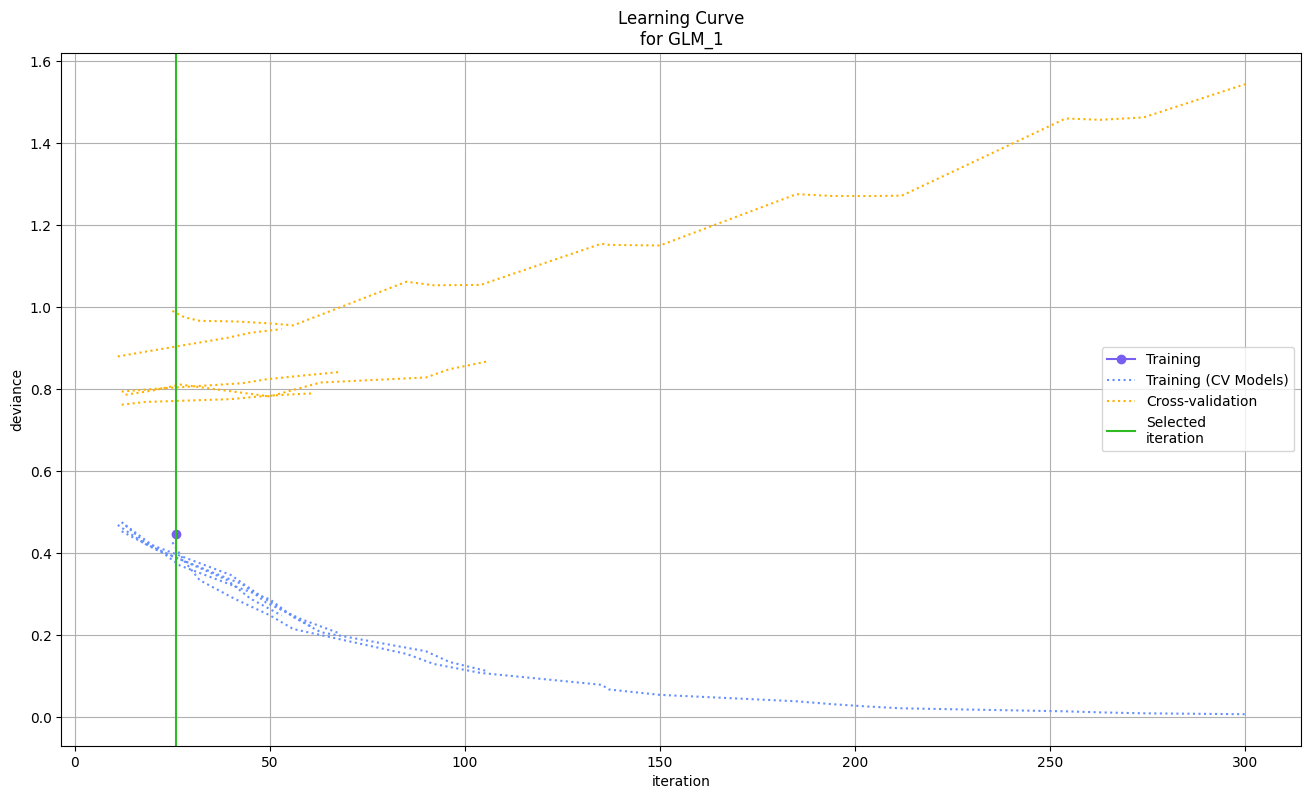

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

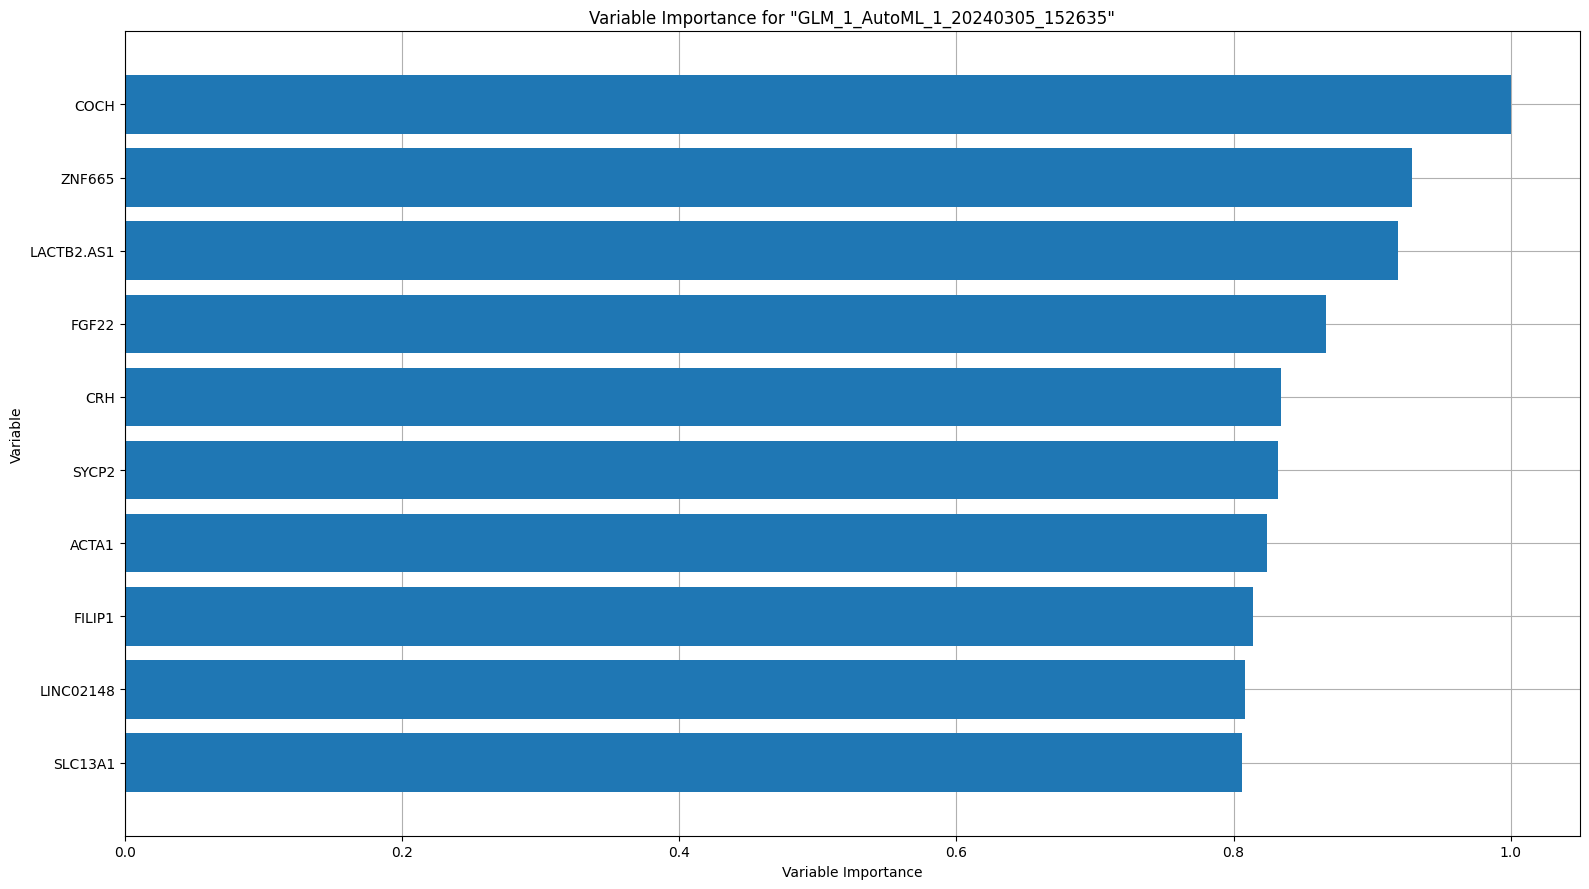

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

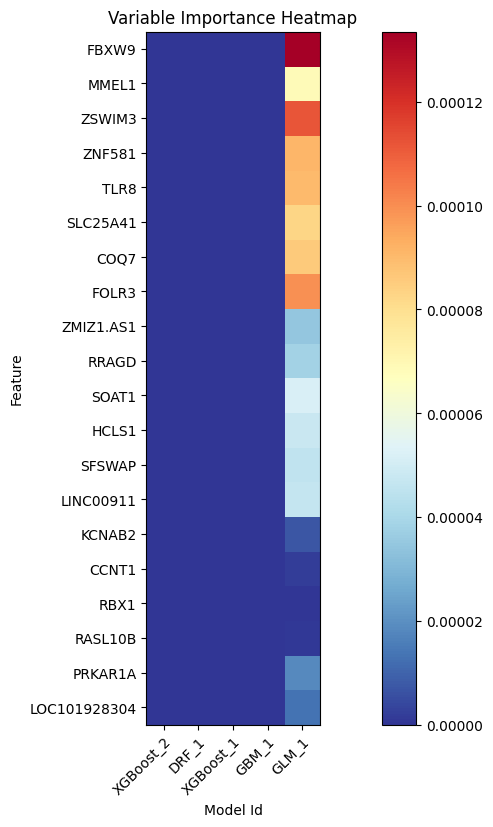

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

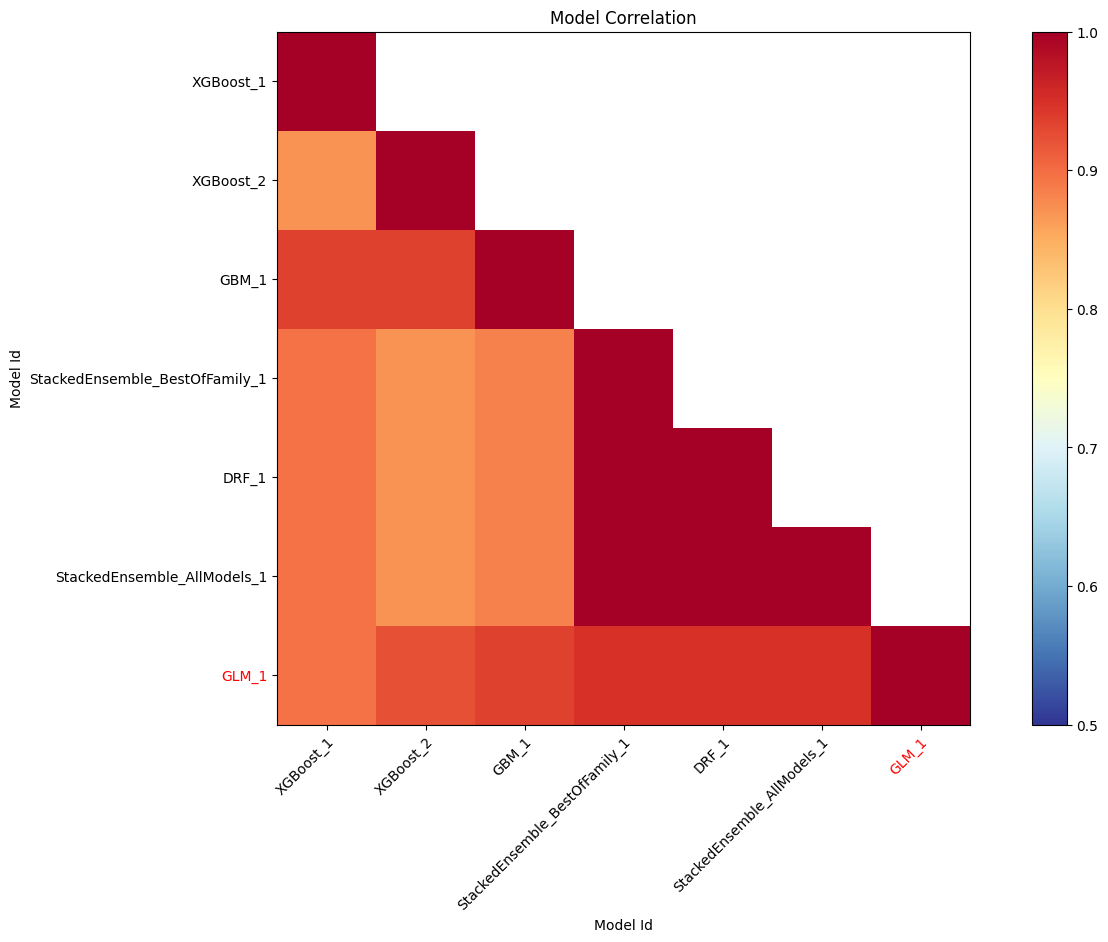

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

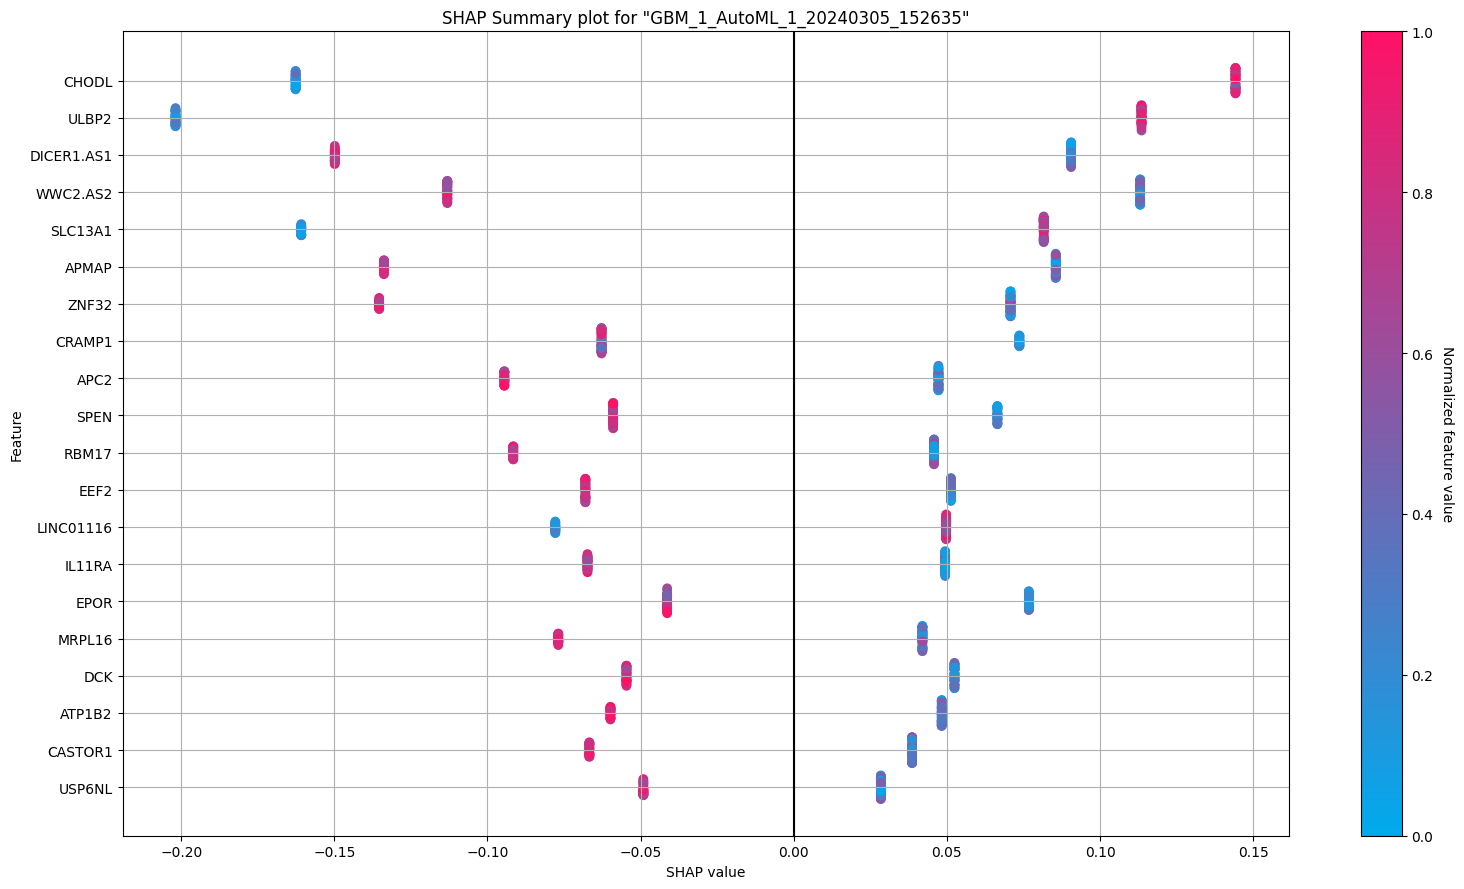

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

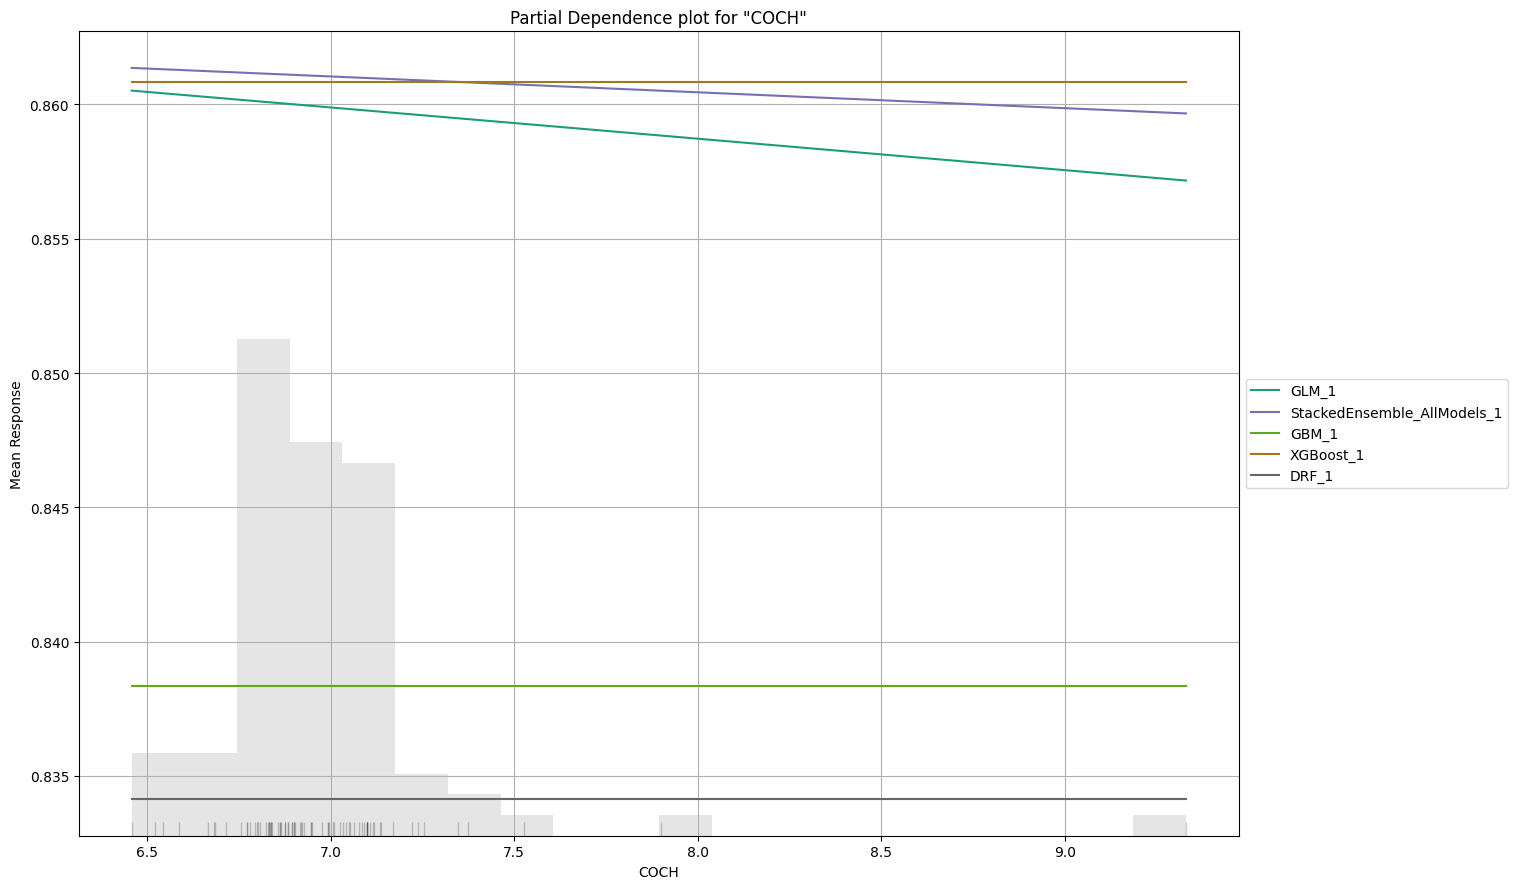

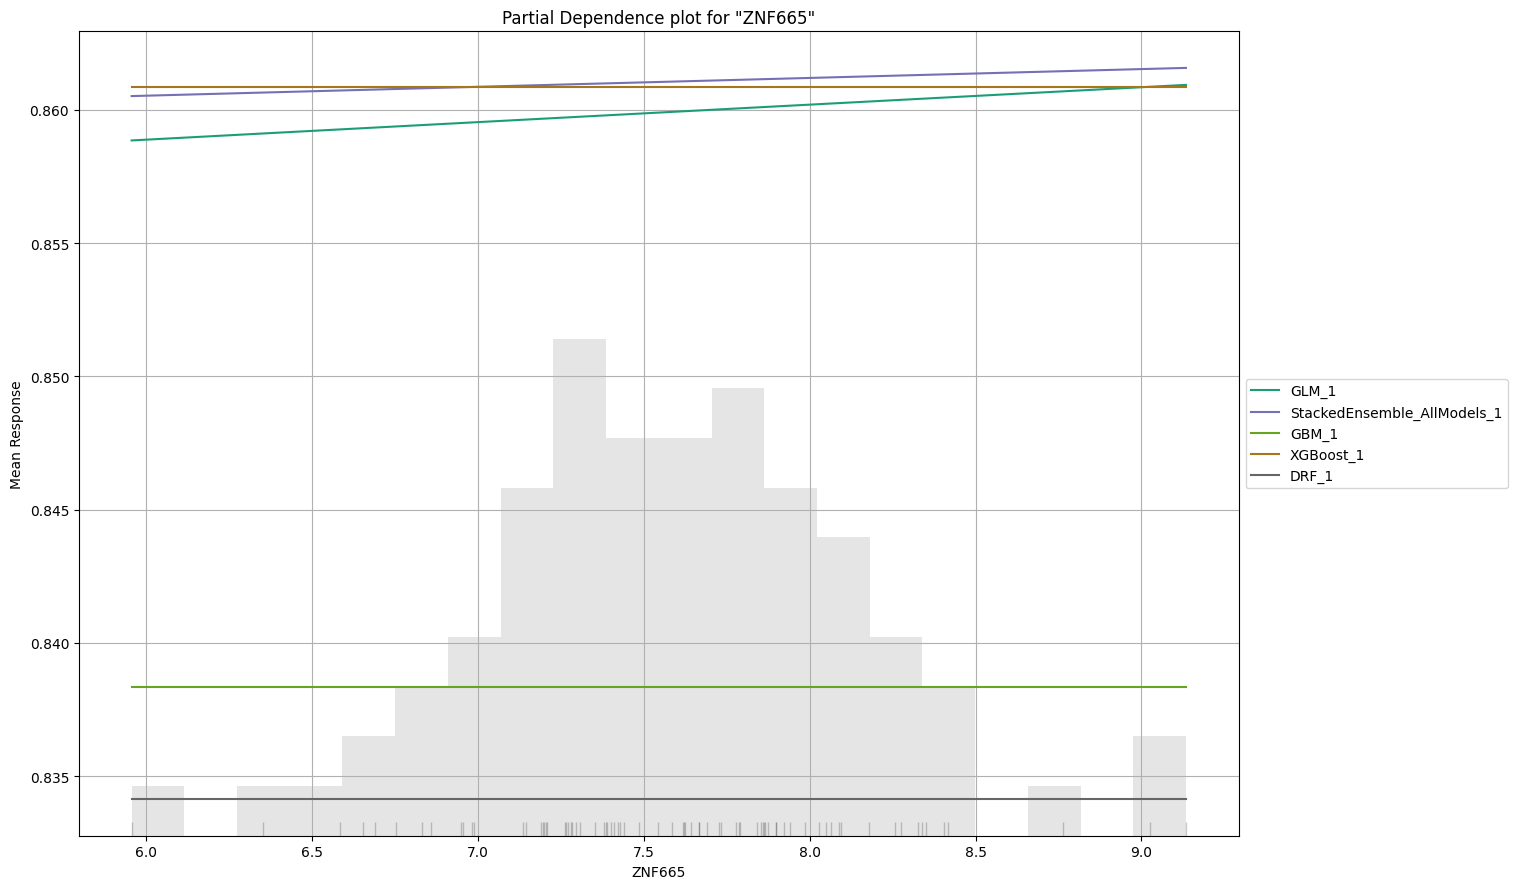

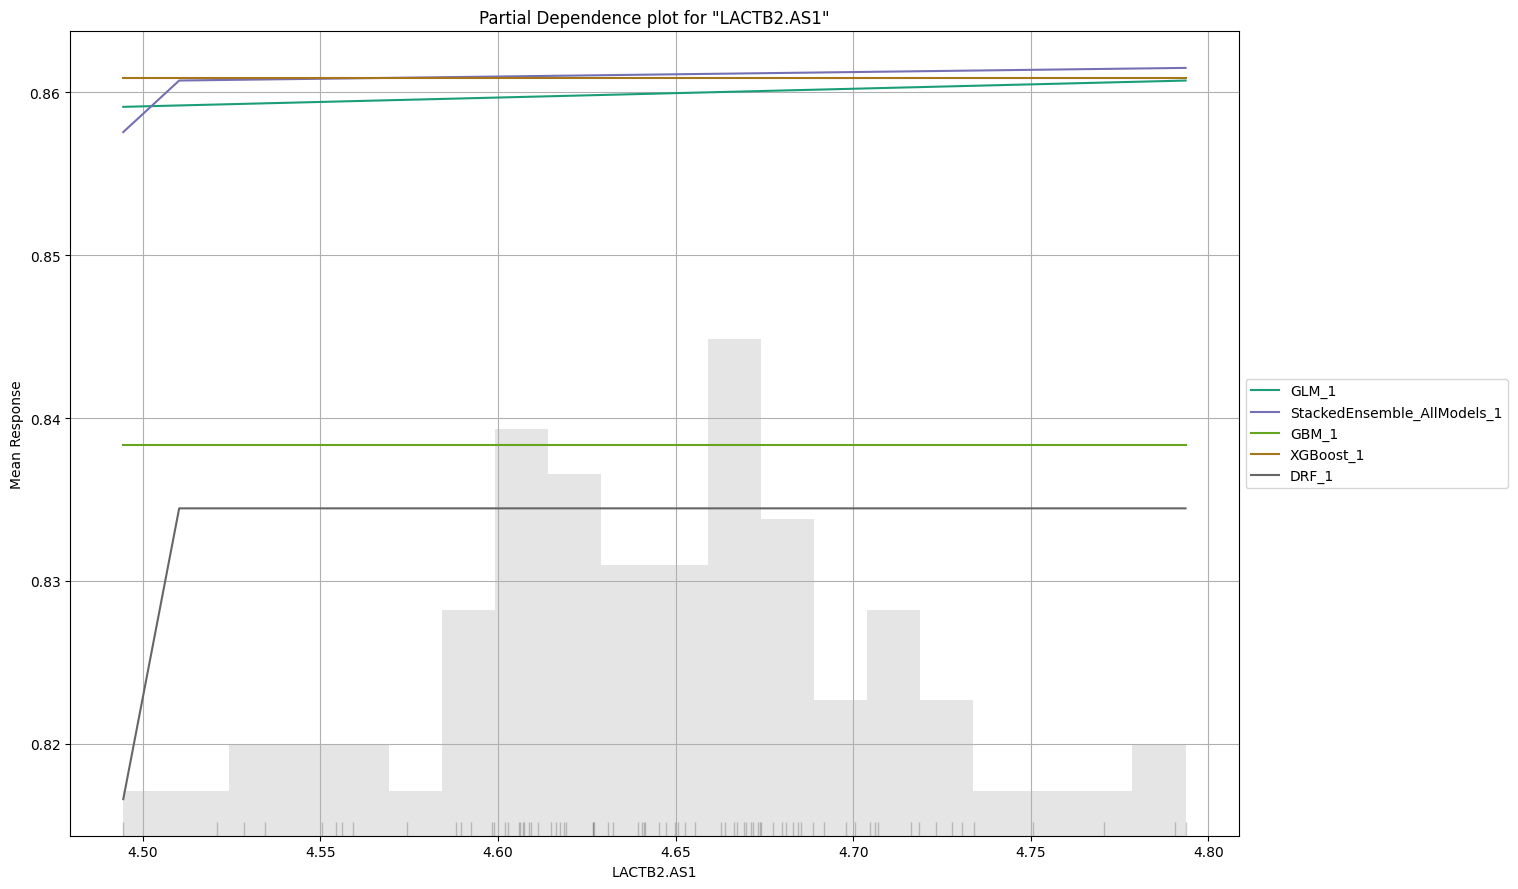

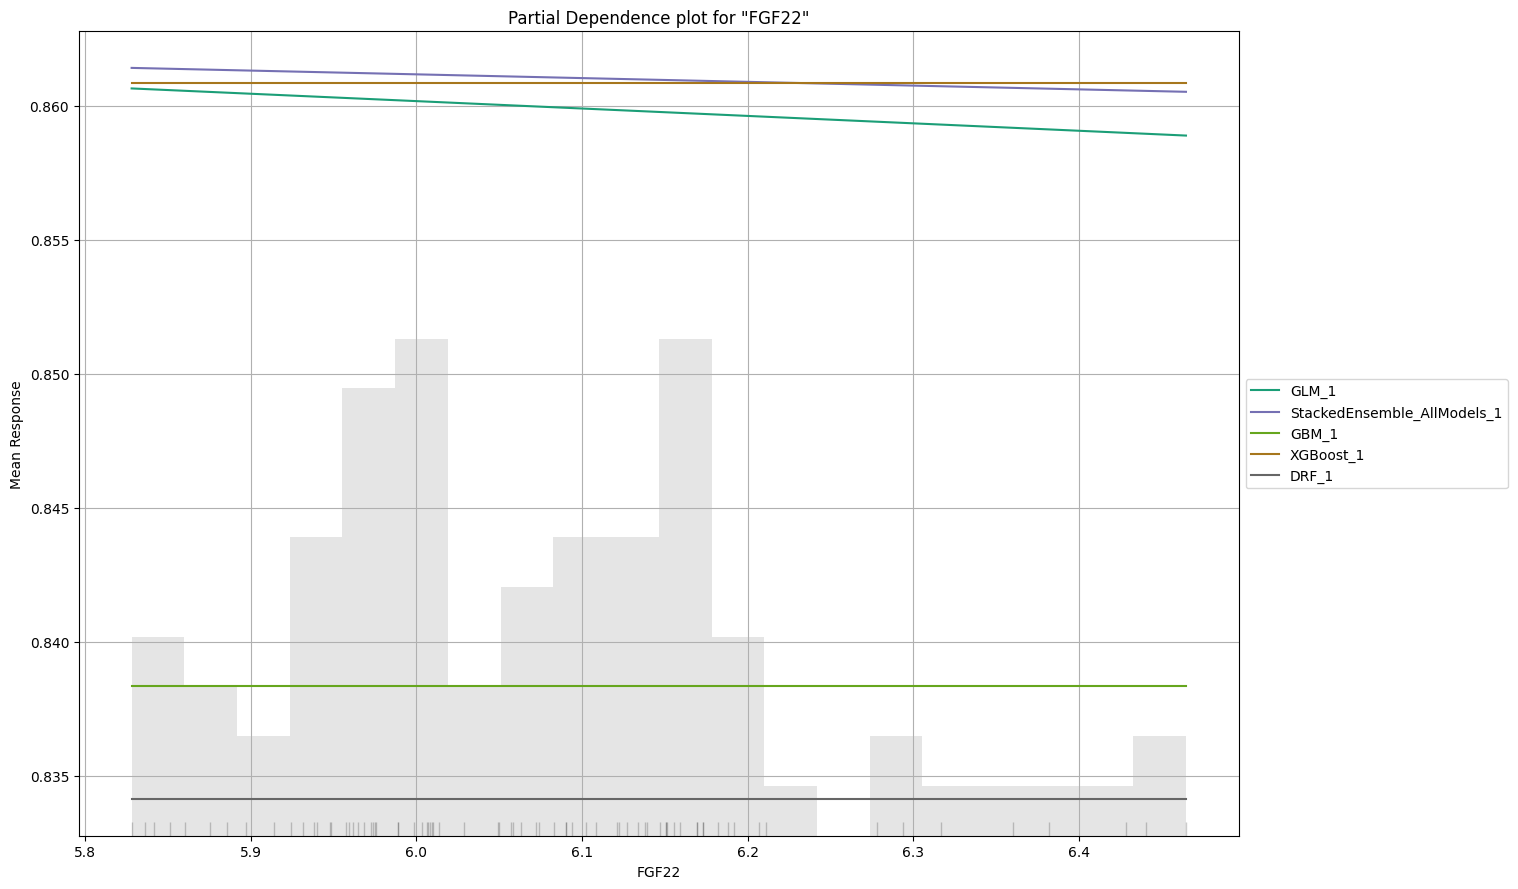

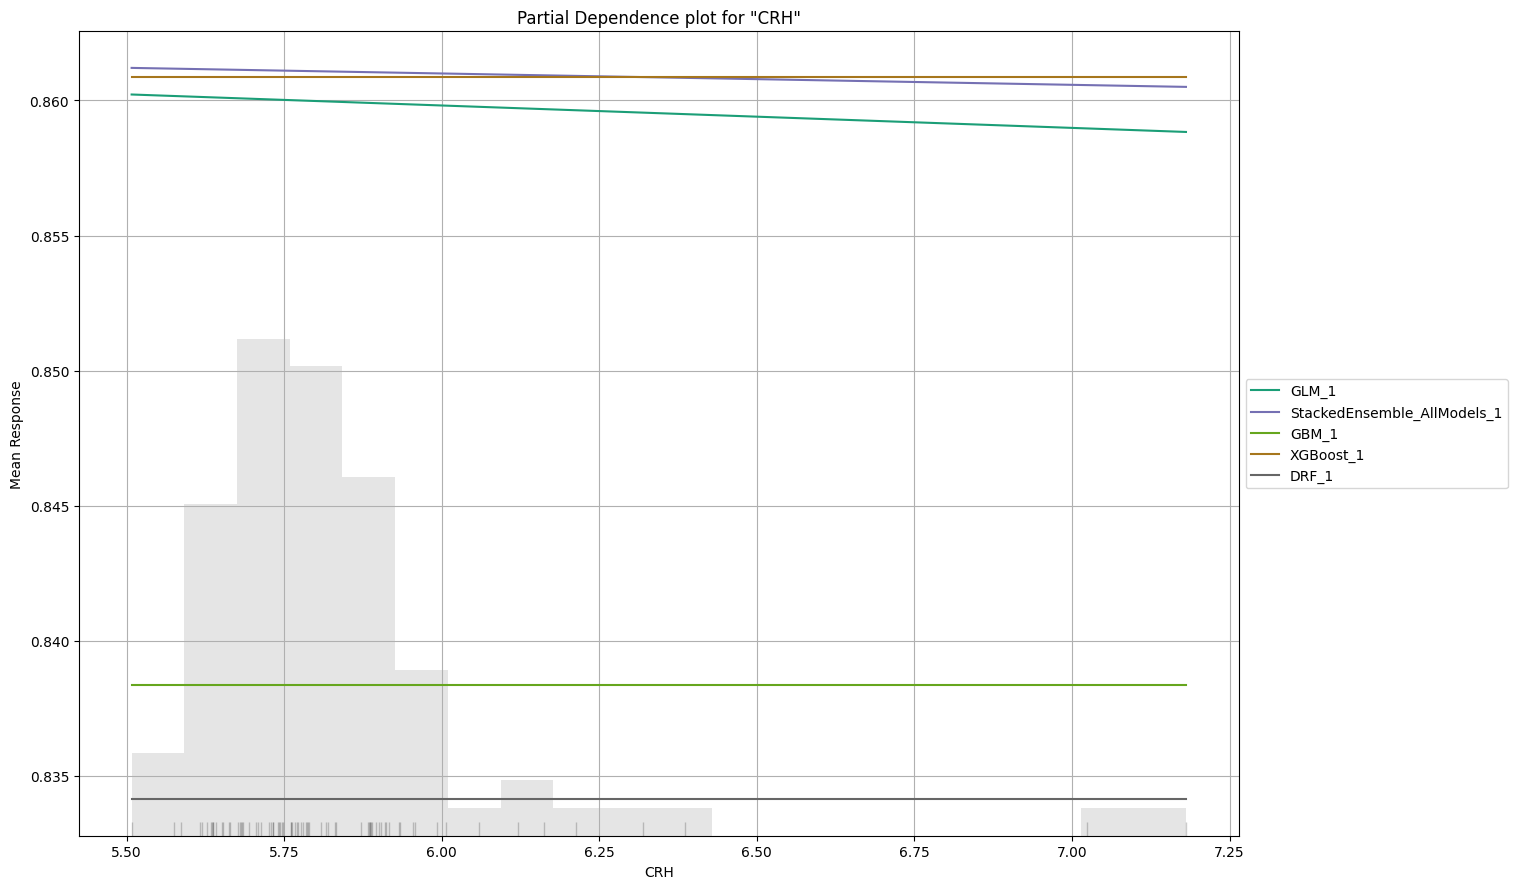

In [ ]:
exm = aml.explain(test)

# Con fenotipos (eliminando filas con valores nulos)

In [4]:
data = pd.concat([ge_matrix, phenotype, outcome], axis=1)
data = data.drop(['PATIENTID'], axis=1)
data = data.dropna()
data

,A1BG,A1BG.AS1,A1CF,A2M,A2M.AS1,A2ML1,A4GALT,A4GNT,AA06,AAAS,...,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,SEX,RACE,WHO_GRADING,CANCER_TYPE,SURVIVAL_STATUS
36,6.773502,6.789219,5.600558,9.098100,6.173517,5.440019,7.269116,6.331675,6.641092,9.134946,...,6.282242,8.895918,9.727756,8.539866,7.788628,FEMALE,WHITE,III,OLIGODENDROGLIOMA,1
37,6.888966,6.919759,5.382967,12.801268,6.267367,5.526409,7.406114,6.055349,6.228142,8.493976,...,6.013034,9.367449,9.538811,8.286802,8.667675,MALE,WHITE,IV,GBM,0
41,6.162679,6.690407,5.488302,13.112363,6.172498,5.311279,7.286909,6.268861,6.310759,8.605680,...,6.189606,8.856313,9.431750,8.242901,7.979640,FEMALE,WHITE,IV,GBM,1
43,6.791863,6.872367,5.427558,12.467948,5.984008,5.637168,7.221617,6.041661,6.152246,8.791074,...,6.385392,9.354172,9.746052,8.382402,8.677187,FEMALE,WHITE,IV,GBM,0
47,7.311807,7.044221,5.411064,13.161513,6.150529,5.508135,7.623547,6.050093,6.328601,8.594638,...,5.967357,9.289735,10.121427,8.246705,8.874775,FEMALE,WHITE,II,ASTROCYTOMA,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,6.127782,6.404686,5.343114,11.859063,5.932489,5.315679,6.677011,6.051749,6.139659,8.313809,...,6.076498,9.856916,9.917498,8.297571,9.226458,FEMALE,WHITE,III,ASTROCYTOMA,1
372,6.344885,7.004975,5.804589,11.338722,6.929918,5.686911,7.256925,6.058814,6.414383,8.773312,...,6.530658,8.815291,9.185908,8.470488,8.670005,FEMALE,WHITE,III,ASTROCYTOMA,0
373,6.879257,6.475546,5.404566,13.971154,6.361109,5.350987,6.612382,6.056349,6.252476,8.680696,...,6.132492,9.081442,10.272506,8.322548,9.013977,MALE,WHITE,IV,GBM,1
374,7.070734,6.458277,5.490874,13.392288,6.268895,5.350325,6.846159,5.956444,6.225297,8.466163,...,6.114066,9.096826,11.026130,8.106846,8.516612,MALE,WHITE,IV,GBM,1


In [5]:
from sklearn.preprocessing import OrdinalEncoder

columns = ['SEX', 'RACE', 'WHO_GRADING', 'CANCER_TYPE']

ordinal_encoder = OrdinalEncoder()

data[columns] = ordinal_encoder.fit_transform(data[columns])
data

,A1BG,A1BG.AS1,A1CF,A2M,A2M.AS1,A2ML1,A4GALT,A4GNT,AA06,AAAS,...,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,SEX,RACE,WHO_GRADING,CANCER_TYPE,SURVIVAL_STATUS
36,6.773502,6.789219,5.600558,9.098100,6.173517,5.440019,7.269116,6.331675,6.641092,9.134946,...,6.282242,8.895918,9.727756,8.539866,7.788628,0.0,5.0,1.0,3.0,1
37,6.888966,6.919759,5.382967,12.801268,6.267367,5.526409,7.406114,6.055349,6.228142,8.493976,...,6.013034,9.367449,9.538811,8.286802,8.667675,1.0,5.0,2.0,1.0,0
41,6.162679,6.690407,5.488302,13.112363,6.172498,5.311279,7.286909,6.268861,6.310759,8.605680,...,6.189606,8.856313,9.431750,8.242901,7.979640,0.0,5.0,2.0,1.0,1
43,6.791863,6.872367,5.427558,12.467948,5.984008,5.637168,7.221617,6.041661,6.152246,8.791074,...,6.385392,9.354172,9.746052,8.382402,8.677187,0.0,5.0,2.0,1.0,0
47,7.311807,7.044221,5.411064,13.161513,6.150529,5.508135,7.623547,6.050093,6.328601,8.594638,...,5.967357,9.289735,10.121427,8.246705,8.874775,0.0,5.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,6.127782,6.404686,5.343114,11.859063,5.932489,5.315679,6.677011,6.051749,6.139659,8.313809,...,6.076498,9.856916,9.917498,8.297571,9.226458,0.0,5.0,1.0,0.0,1
372,6.344885,7.004975,5.804589,11.338722,6.929918,5.686911,7.256925,6.058814,6.414383,8.773312,...,6.530658,8.815291,9.185908,8.470488,8.670005,0.0,5.0,1.0,0.0,0
373,6.879257,6.475546,5.404566,13.971154,6.361109,5.350987,6.612382,6.056349,6.252476,8.680696,...,6.132492,9.081442,10.272506,8.322548,9.013977,1.0,5.0,2.0,1.0,1
374,7.070734,6.458277,5.490874,13.392288,6.268895,5.350325,6.846159,5.956444,6.225297,8.466163,...,6.114066,9.096826,11.026130,8.106846,8.516612,1.0,5.0,2.0,1.0,1


In [10]:
data = h2o.H2OFrame(data)
train, test = data.split_frame(ratios = [0.8], seed = 1234)

Parse progress: |██████████████████████████████████████████████████████████████████| (done) 100%


In [11]:
import h2o
from h2o.automl import H2OAutoML

# Start the H2O cluster (locally)
h2o.init()

# Identify predictors and response
x = train.columns
y = "SURVIVAL_STATUS"
x.remove(y)

# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

# Run AutoML for 20 base models
aml = H2OAutoML(max_models=4, seed=1)
aml.train(x=x, y=y, training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,34 mins 57 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,2 months and 14 days
H2O_cluster_name:,H2O_from_python_unknownUser_kuo581
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.327 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


AutoML progress: |█████████████████████████████████████████████████████████████
10:01:02.516: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 136.0.

██| (done) 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GLM_1_AutoML_3_20240306_94148,0.730861,0.398989,0.9294,0.395136,0.346968,0.120386
StackedEnsemble_AllModels_1_AutoML_3_20240306_94148,0.704147,0.400084,0.922449,0.477273,0.351315,0.123422
StackedEnsemble_BestOfFamily_1_AutoML_3_20240306_94148,0.703349,0.398113,0.92158,0.431818,0.349328,0.12203
DRF_1_AutoML_3_20240306_94148,0.670056,0.405545,0.90931,0.409091,0.350348,0.122744
XGBoost_2_AutoML_3_20240306_94148,0.517344,0.473167,0.858464,0.5,0.379118,0.143731
XGBoost_1_AutoML_3_20240306_94148,0.421053,0.445367,0.804385,0.5,0.369272,0.136362


In [12]:
preds = aml.predict(test)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [13]:
lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
lb

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GLM_1_AutoML_3_20240306_94148,0.730861,0.398989,0.9294,0.395136,0.346968,0.120386,26724,7.58561,GLM
StackedEnsemble_AllModels_1_AutoML_3_20240306_94148,0.704147,0.400084,0.922449,0.477273,0.351315,0.123422,5697,27.111,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_3_20240306_94148,0.703349,0.398113,0.92158,0.431818,0.349328,0.12203,4965,32.8503,StackedEnsemble
DRF_1_AutoML_3_20240306_94148,0.670056,0.405545,0.90931,0.409091,0.350348,0.122744,60715,7.72141,DRF
XGBoost_2_AutoML_3_20240306_94148,0.517344,0.473167,0.858464,0.5,0.379118,0.143731,3363,7.56467,XGBoost
XGBoost_1_AutoML_3_20240306_94148,0.421053,0.445367,0.804385,0.5,0.369272,0.136362,3393,7.73611,XGBoost


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
XGBoost_1_AutoML_3_20240306_94148,0.67284,0.321789,0.917411,0.5,0.297108,0.0882731,3393,34.3632,XGBoost
GLM_1_AutoML_3_20240306_94148,0.62963,0.329376,0.896972,0.333333,0.285028,0.0812407,26724,36.1354,GLM
StackedEnsemble_BestOfFamily_1_AutoML_3_20240306_94148,0.62963,0.320102,0.910542,0.333333,0.289715,0.083935,4965,118.491,StackedEnsemble
DRF_1_AutoML_3_20240306_94148,0.617284,0.341906,0.909036,0.333333,0.302069,0.0912457,60715,40.8624,DRF
StackedEnsemble_AllModels_1_AutoML_3_20240306_94148,0.617284,0.319612,0.895525,0.333333,0.290672,0.08449,5697,190.743,StackedEnsemble
XGBoost_2_AutoML_3_20240306_94148,0.518519,0.368693,0.903601,0.5,0.318399,0.101378,3363,32.8542,XGBoost


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GLM_1_AutoML_3_20240306_94148

,0,1,Error,Rate
0,1.0,2.0,0.6667,(2.0/3.0)
1,0.0,27.0,0.0,(0.0/27.0)
Total,1.0,29.0,0.0667,(2.0/30.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

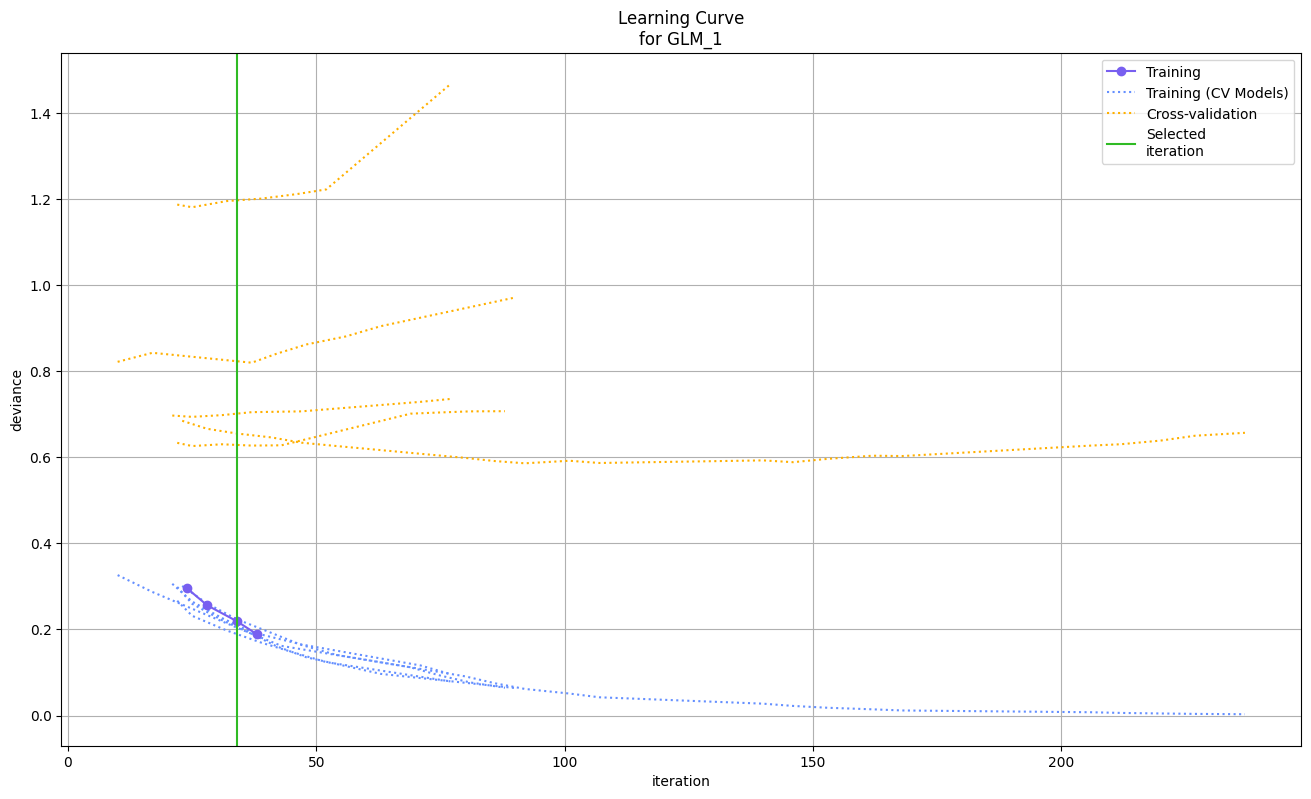

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

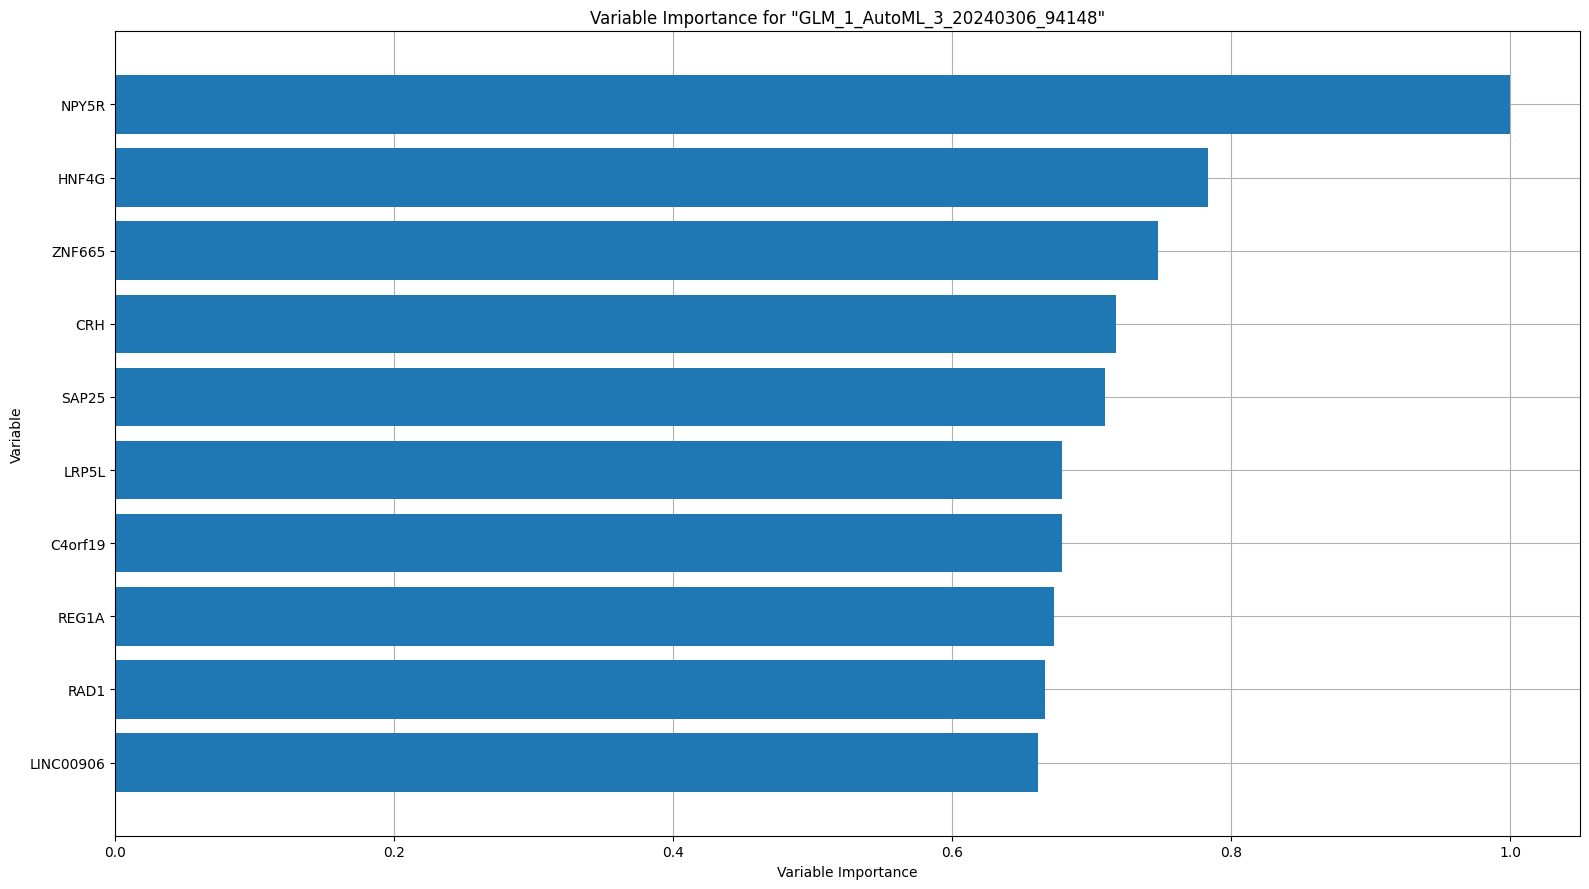

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

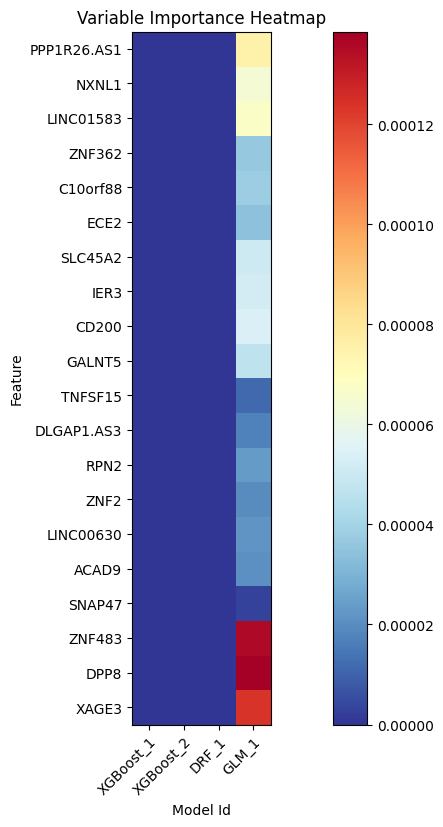

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

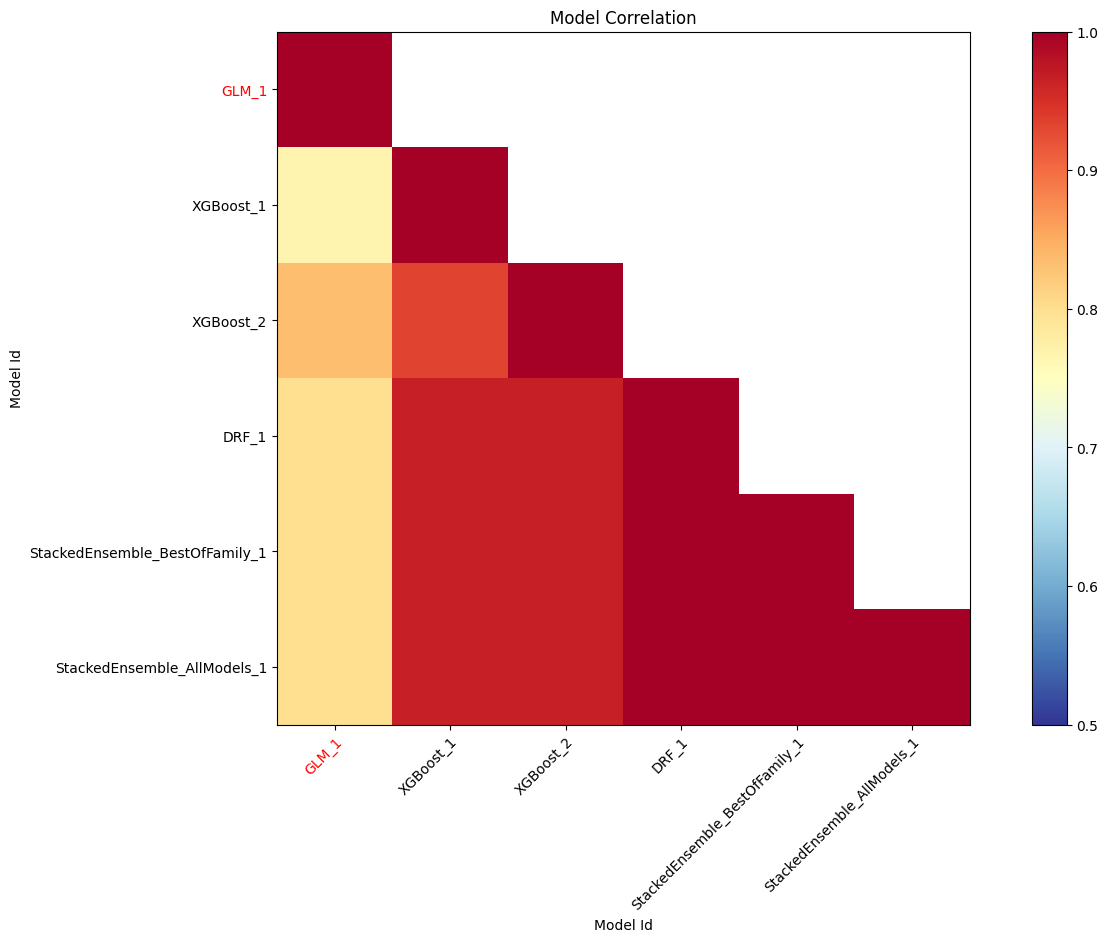

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

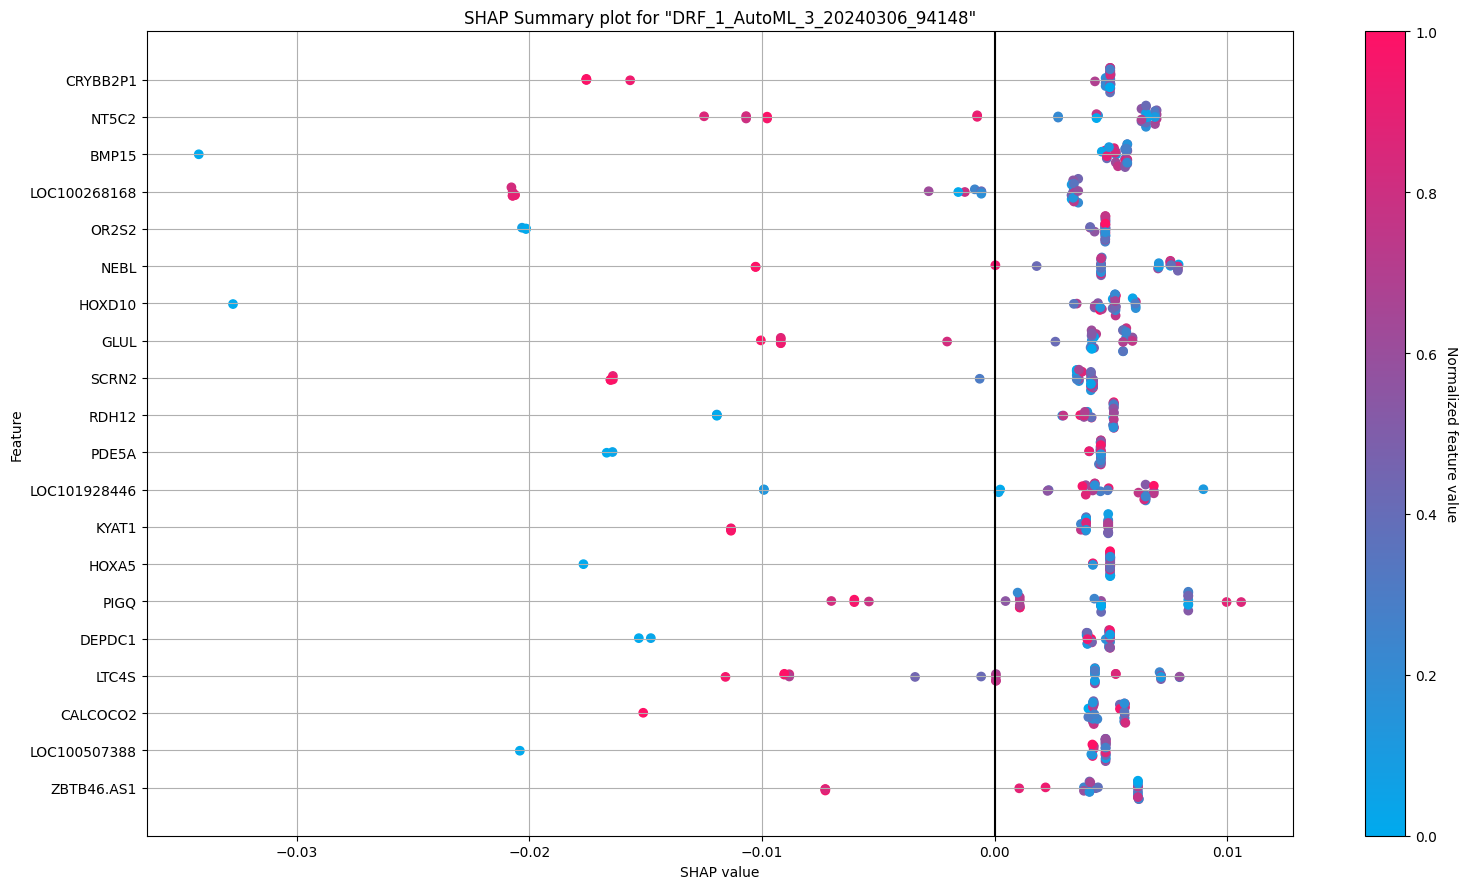

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

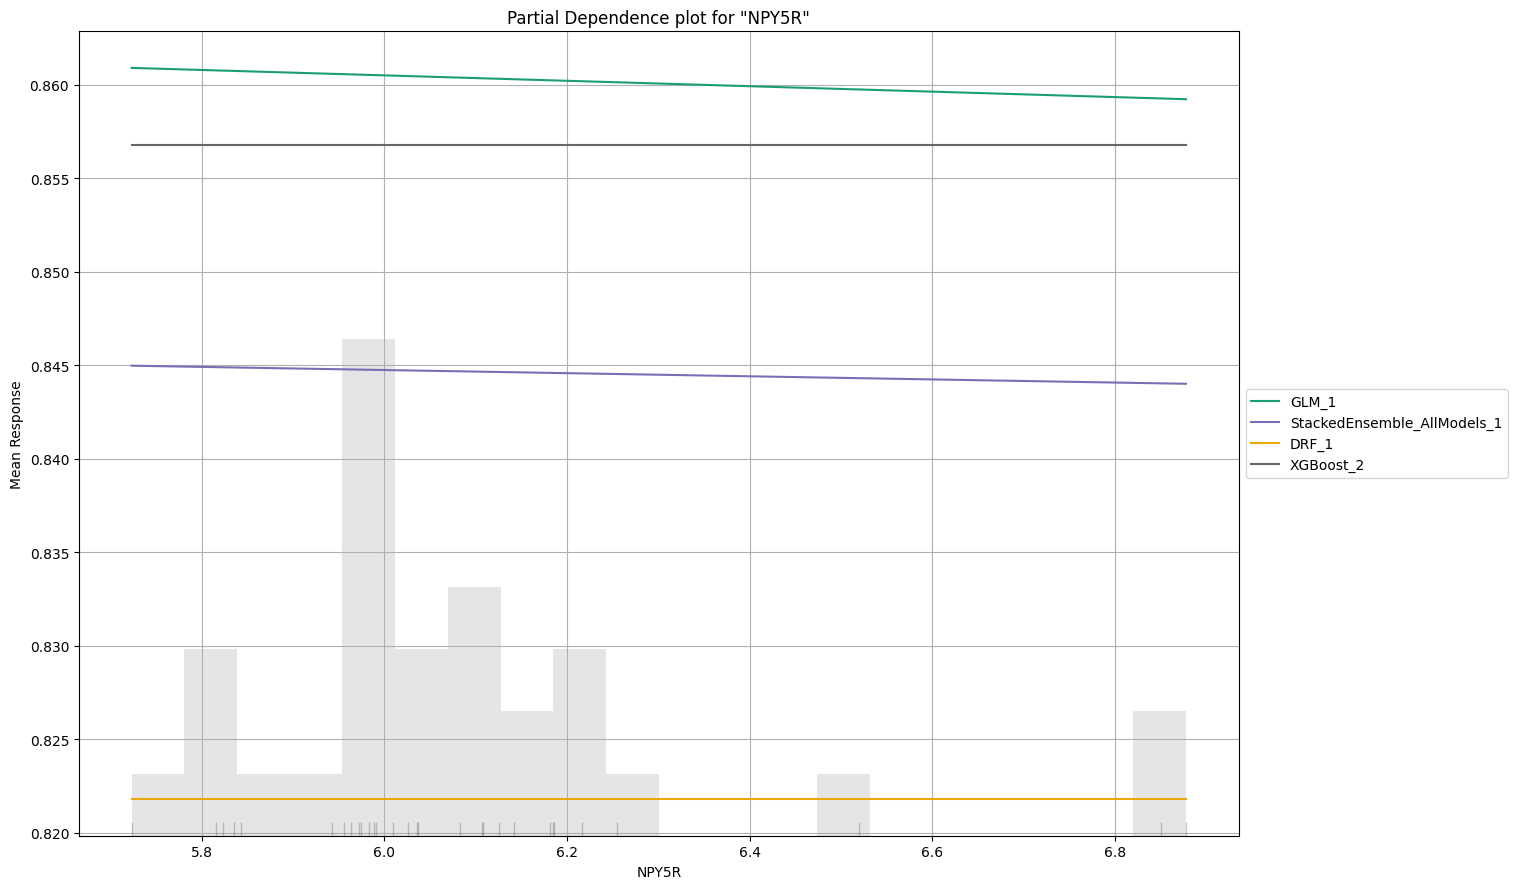

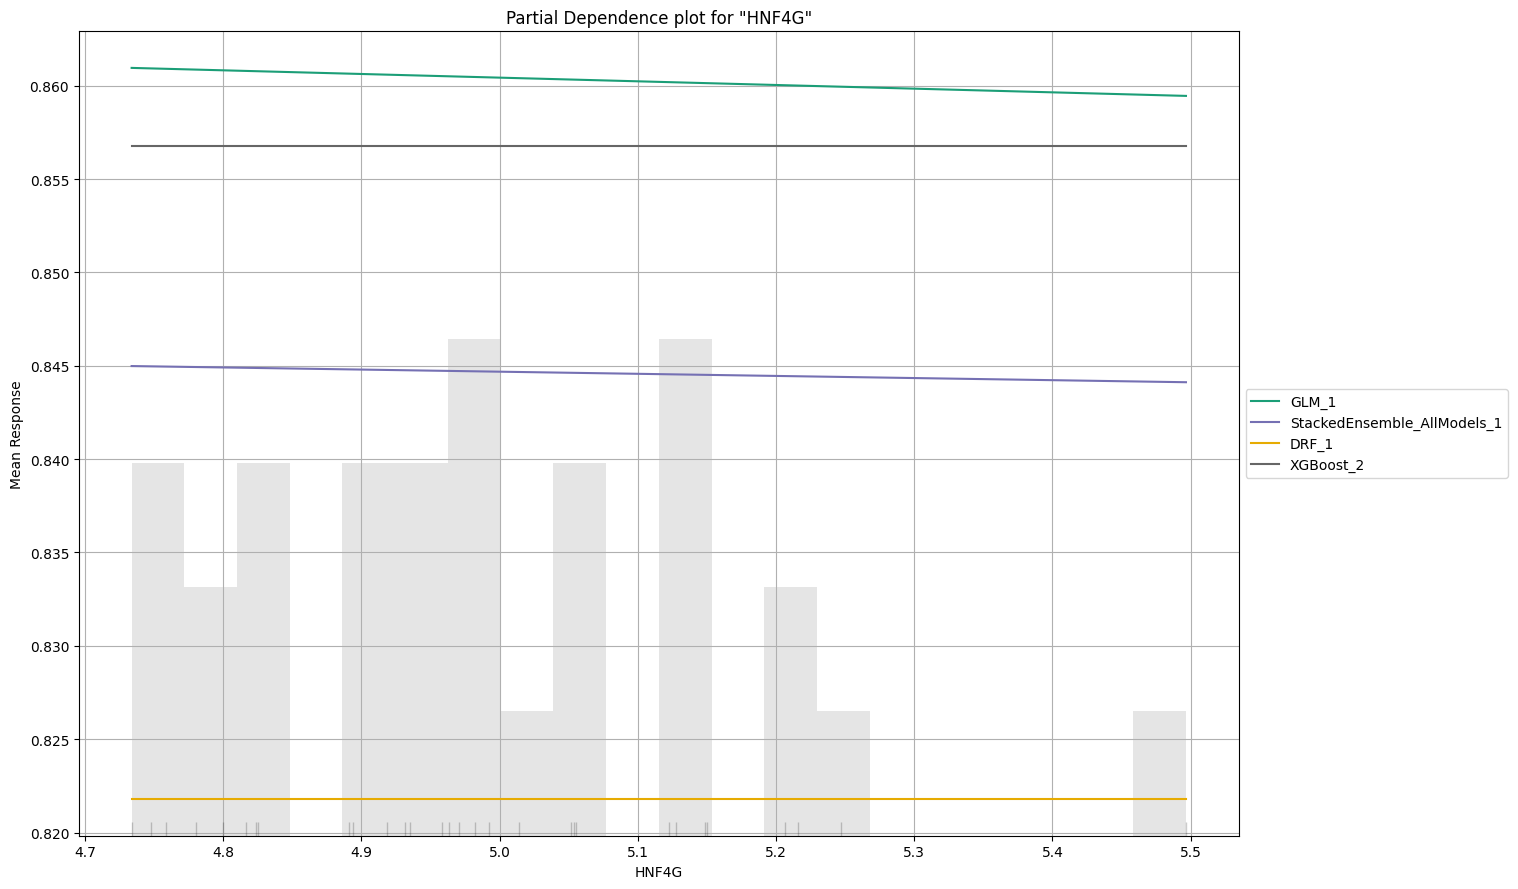

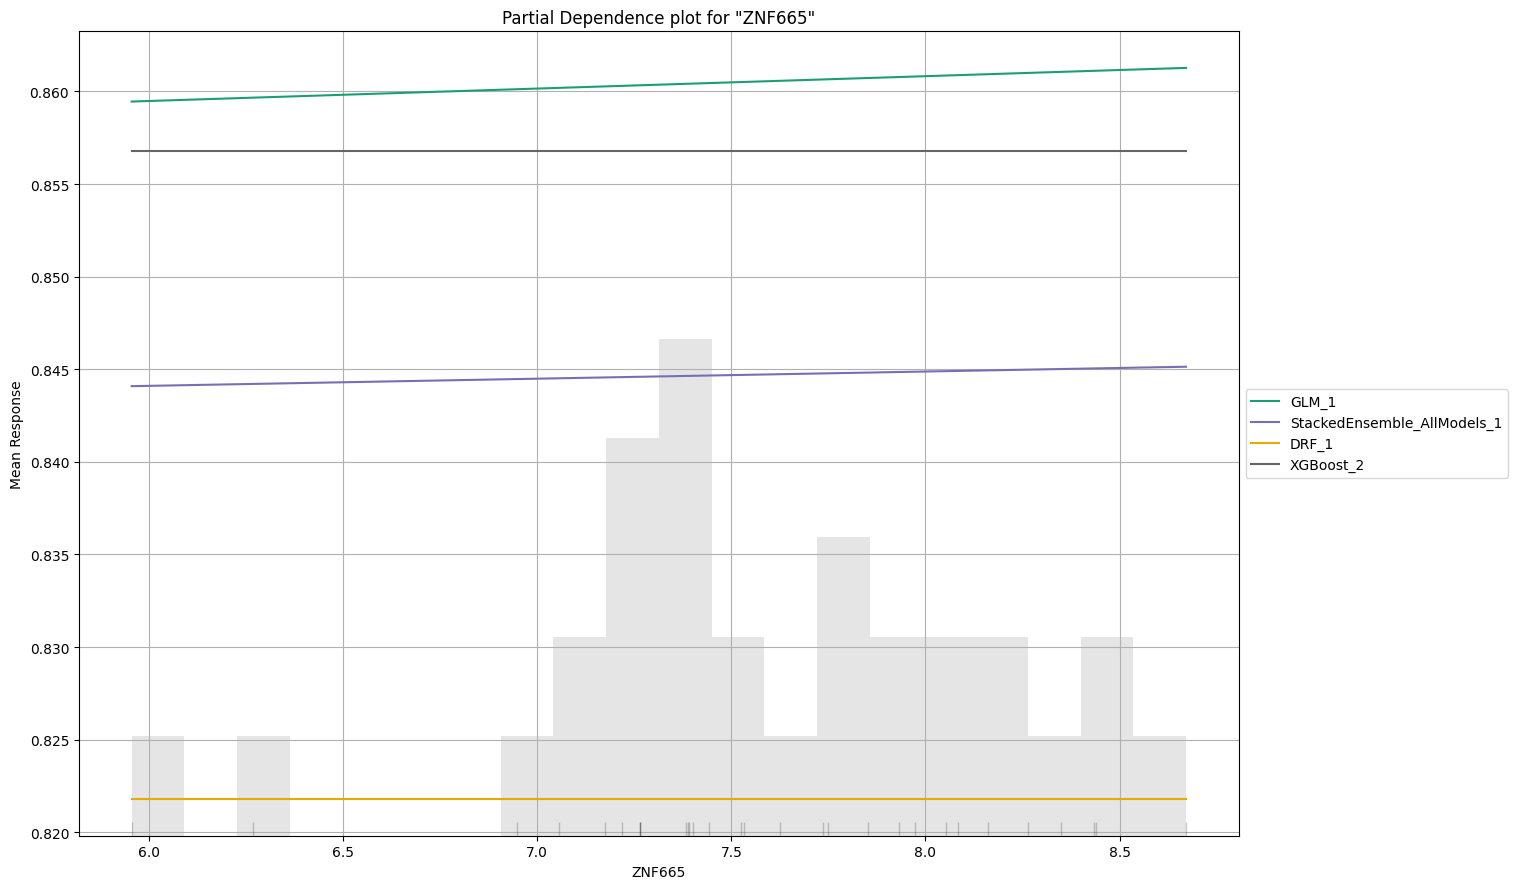

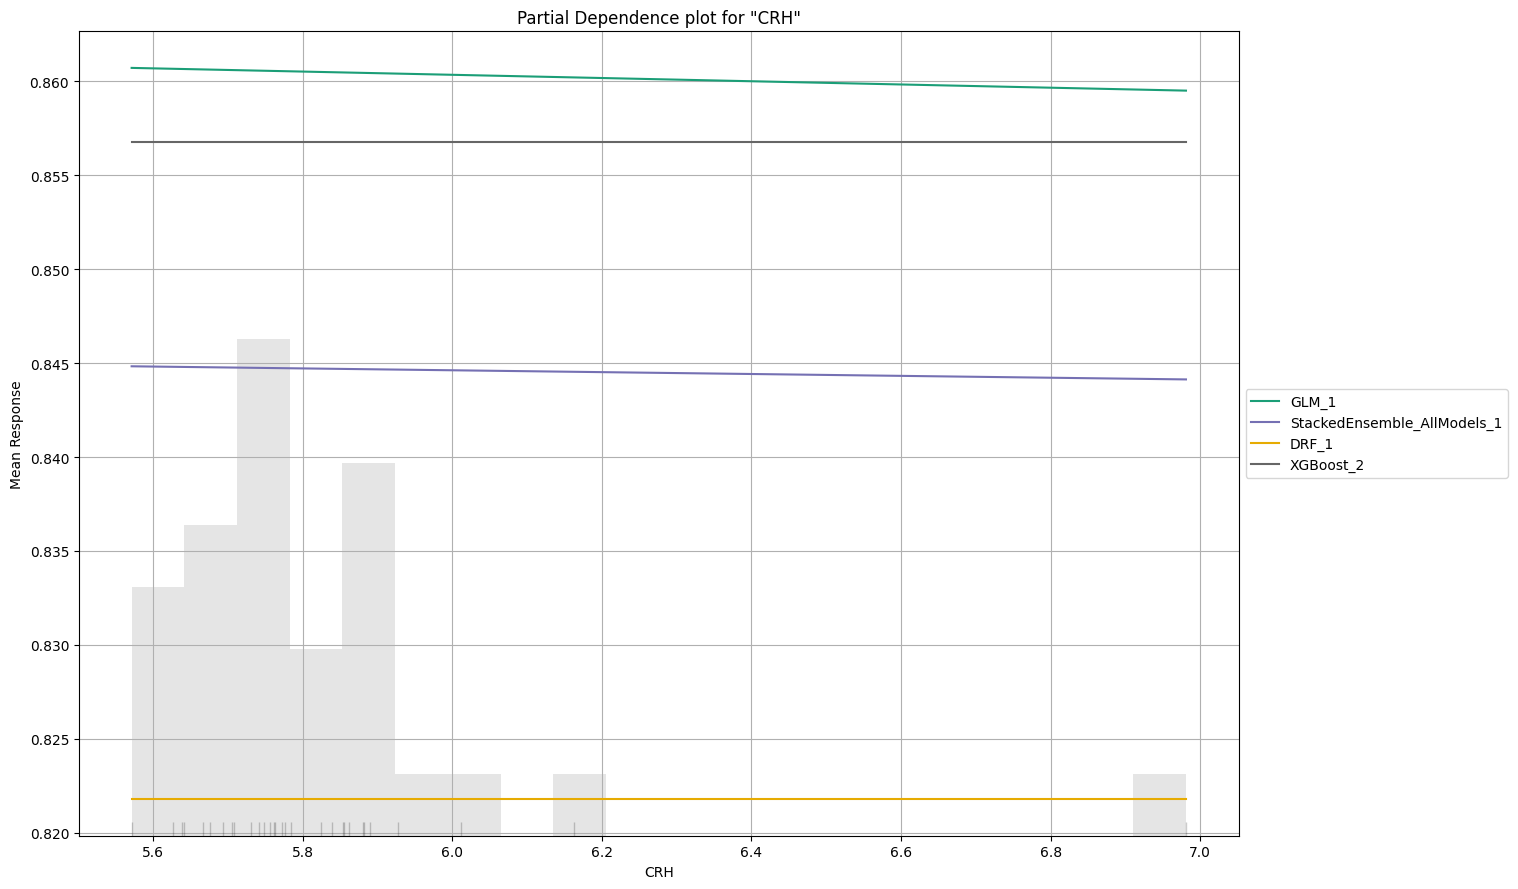

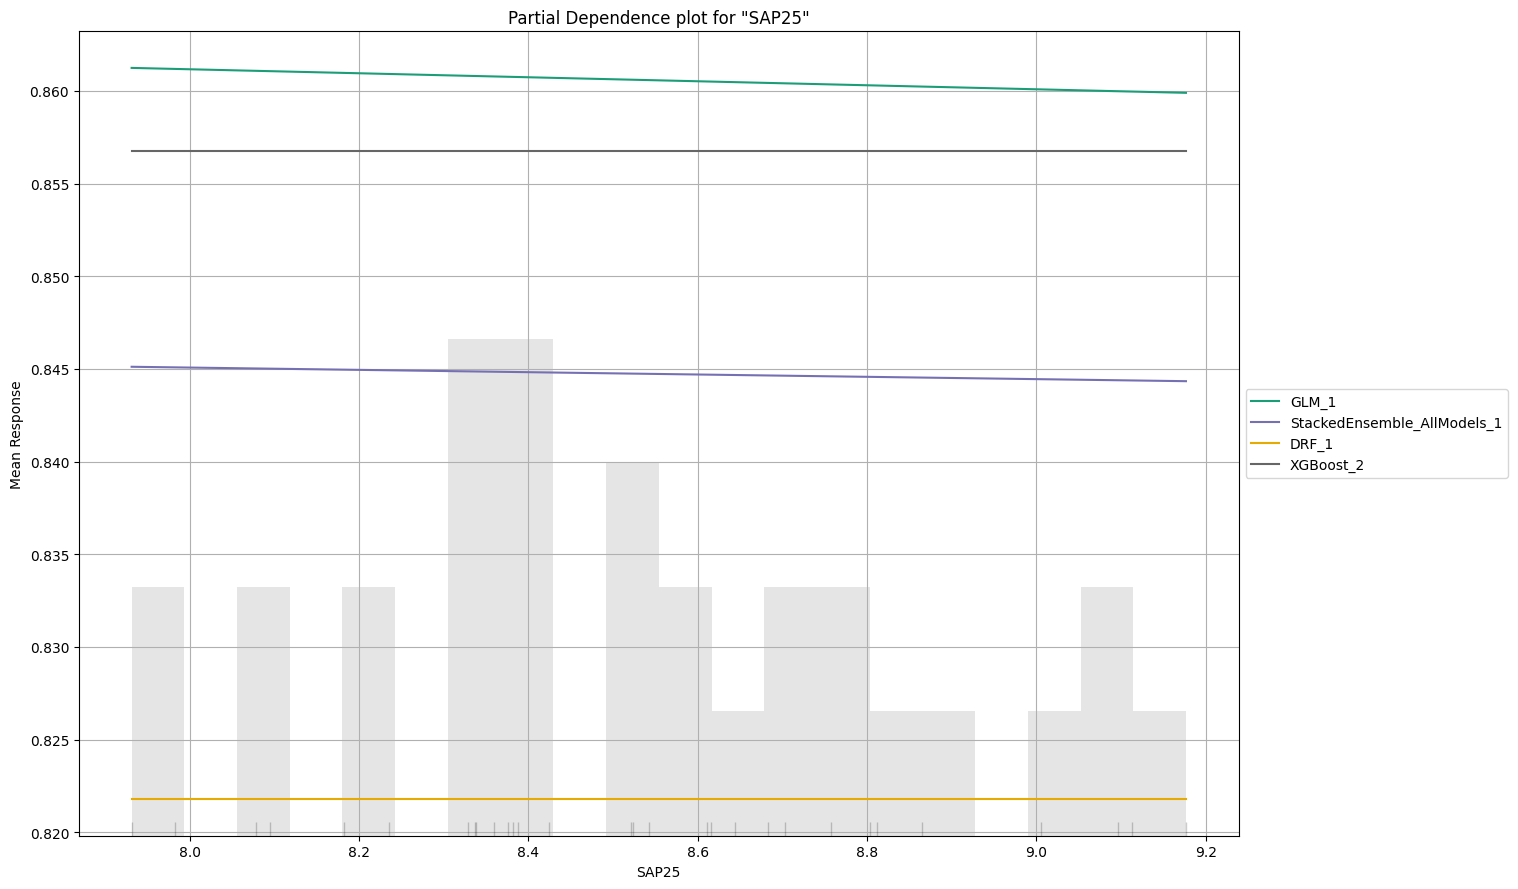

In [14]:
exm = aml.explain(test)